In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [5]:
# Load dataset
data = pd.read_csv('/content/data[1].csv', encoding='latin1')

# Print all column names to identify the correct NO2 column
print("Columns in the DataFrame:", data.columns.tolist())

# Use NO2 column (make sure column name matches exactly)
x = data['no2'].dropna().values

# Replace with YOUR UNIVERSITY ROLL NUMBER
r = 102303532

# Compute parameters
ar = 0.05 * (r % 7)
br = 0.3 * ((r % 5) + 1)

print("ar =", ar)
print("br =", br)

# Transformation function
def transform(x, ar, br):
    return x + ar * np.sin(br * x)

# Apply transformation
z = transform(x, ar, br)


Columns in the DataFrame: ['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type', 'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5', 'date']
ar = 0.1
br = 0.8999999999999999


/tmp/ipython-input-1522554826.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/data[1].csv', encoding='latin1')


In [6]:
def pdf_model(z, c, lam, mu):
    return c * np.exp(-lam * (z - mu)**2)


In [7]:
# Create histogram density
hist_values, bin_edges = np.histogram(z, bins=50, density=True)

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2


In [8]:
# Initial guesses
initial_guess = [1, 0.01, np.mean(z)]

# Fit model
params, covariance = curve_fit(pdf_model, bin_centers, hist_values, p0=initial_guess)

c_est, lambda_est, mu_est = params

print("Estimated Parameters:")
print("c =", c_est)
print("lambda =", lambda_est)
print("mu =", mu_est)


Estimated Parameters:
c = 0.02680223003062028
lambda = 0.002057486697464275
mu = 19.62960741231495


/tmp/ipython-input-3495091883.py:2: RuntimeWarning: overflow encountered in exp
  return c * np.exp(-lam * (z - mu)**2)


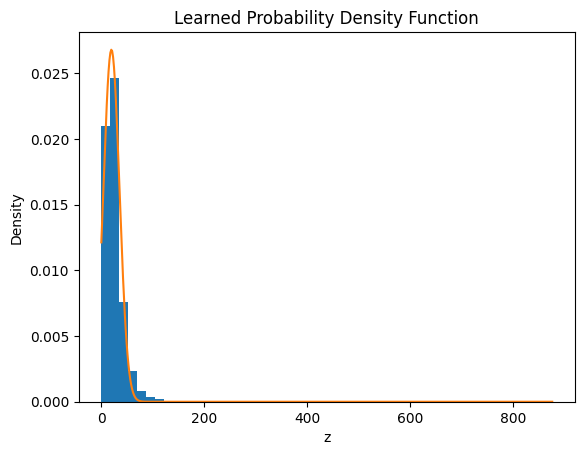

In [9]:
z_range = np.linspace(min(z), max(z), 500)
fitted_pdf = pdf_model(z_range, c_est, lambda_est, mu_est)

plt.figure()
plt.hist(z, bins=50, density=True)
plt.plot(z_range, fitted_pdf)
plt.title("Learned Probability Density Function")
plt.xlabel("z")
plt.ylabel("Density")
plt.show()
